In [1]:
import numpy as np
import DMemu
import matplotlib.pyplot as plt
from time import time

In [2]:
# load emulator
emul = DMemu.OBDemu()

One-body decays emulator loaded!


In [3]:
# predict suppressions for three different scales at three different redshifts
k = np.array([1,2,4]) # in h/Mpc
z = np.array([0.0,1.0,2.0])

# this the order and types of input parameters
# k: Union[float,list], 
# z: Union[float,list], 
# Gamma: float = 1e-10, 
# f: float = 0., 
# Ob: float =0.049, 
# Om: float = 0.315, 
# h:float = 0.67

Gamma = 1/50
f = 1.0

print(emul.predict(k,z,Gamma,f))

k: [0.67 1.34 2.68]
You have chosen z>1; z=[0. 1. 2.]!
-> the fit could be unaccurate with this choice! (error might be > 10%)
[0.85730475 0.93428115 0.96346161]


k: [6.70000000e-06 6.80897610e-06 6.91972470e-06 7.03227464e-06
 7.14665522e-06 7.26289621e-06 7.38102786e-06 7.50108094e-06
 7.62308669e-06 7.74707688e-06 7.87308378e-06 8.00114019e-06
 8.13127945e-06 8.26353544e-06 8.39794258e-06 8.53453587e-06
 8.67335085e-06 8.81442368e-06 8.95779107e-06 9.10349034e-06
 9.25155943e-06 9.40203687e-06 9.55496184e-06 9.71037415e-06
 9.86831425e-06 1.00288233e-05 1.01919430e-05 1.03577158e-05
 1.05261850e-05 1.06973943e-05 1.08713884e-05 1.10482125e-05
 1.12279127e-05 1.14105357e-05 1.15961291e-05 1.17847412e-05
 1.19764210e-05 1.21712186e-05 1.23691845e-05 1.25703704e-05
 1.27748286e-05 1.29826124e-05 1.31937757e-05 1.34083737e-05
 1.36264620e-05 1.38480977e-05 1.40733382e-05 1.43022423e-05
 1.45348696e-05 1.47712805e-05 1.50115367e-05 1.52557007e-05
 1.55038360e-05 1.57560073e-05 1.60122802e-05 1.62727214e-05
 1.65373986e-05 1.68063809e-05 1.70797382e-05 1.73575417e-05
 1.76398636e-05 1.79267776e-05 1.82183582e-05 1.85146814e-05
 1.88158244e-05 1.912

Text(0, 0.5, '$P_{\\rm DDM}/P_{\\Lambda \\rm CDM}$')

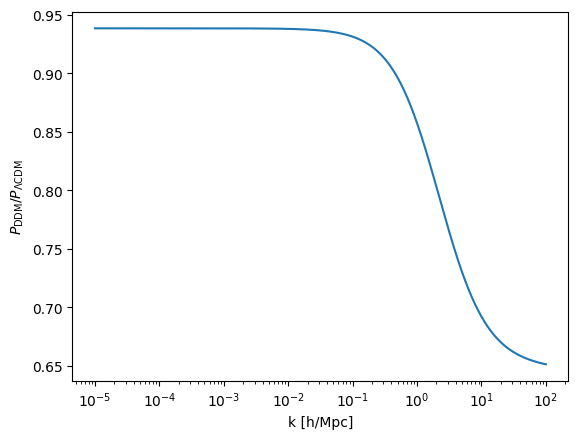

In [4]:
# predict suppressions between kmin and kmax for a single redshift
kmin = 1e-5
kmax = 100
ks = np.logspace(np.log10(kmin),np.log10(kmax),1000)
zs = 0.0

gamma_decay = 1/50
f = 1.0

st = time()
pks = emul.predict(ks,zs,gamma_decay,f)
print('ellapsed:',time() - st)

# plot
plt.semilogx(ks,pks)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{\rm DDM}/P_{\Lambda \rm CDM}$')

In [5]:
# predict suppression for a single scale and different redshifts
k = 0.50 # h/Mpc
zs = [2.0,1.0,0.0,2.35]
gamma = 1/50
f = 1.0

st = time()
pks = emul.predict(k,zs,gamma,f)
print('ellapsed:',time() - st)
print('got Pk:',pks)

ellapsed: 0.0005052089691162109
got Pk: [0.98514686 0.96356076 0.89603679 0.9888888 ]


In [20]:
# extrapolation:


True